## 应用注意
- 对数据进行标准化、中心化处理 均值为0，方差为1
- 需要考虑特征非线性，产生多项式，degree项，交叉项
- 使用ElasticNet，L1正则和L2正则都考虑进去，使用交叉验证

Ridge使用L2正则

Lasso使用L1正则，Lasso具有特征选择的功效

In [25]:
# -*- coding:utf-8 -*-

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import ElasticNetCV
import sklearn.datasets
from pprint import pprint
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings(action='ignore') #不输出警告
np.set_printoptions(suppress=True) #输出小数而不是科学计数suppress : bool, optional
                                   #Whether or not suppress printing of small floating point values using scientific notation (default False).
%matplotlib inline

In [26]:
data = sklearn.datasets.load_boston()
x = np.array(data.data)
y = np.array(data.target)
print(u'样本个数：%d, 特征个数：%d' % x.shape)
print(y.shape)

样本个数：506, 特征个数：13
(506,)


In [27]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, random_state=1)

In [28]:
model = Pipeline([
        ('ss',StandardScaler()),
        ('poly',PolynomialFeatures(degree=2,include_bias=True)), #degree:多项式阶数，bias:偏差列，特征补充的全为1的那列
        ('linear',ElasticNetCV(l1_ratio=[0.1,0.3,0.5,0.7,0.99,1],alphas=np.logspace(-3,2,10),
                              fit_intercept=False,max_iter=1000,cv=5))
    ])
print("开始训练...")
model.fit(x_train,y_train)

开始训练...


Pipeline(memory=None,
     steps=[('ss', StandardScaler(copy=True, with_mean=True, with_std=True)), ('poly', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('linear', ElasticNetCV(alphas=array([   0.001  ,    0.00359,    0.01292,    0.04642,    0.16681,
          0.59948,    2.15443,    7.74264,   2...ive=False, precompute='auto',
       random_state=None, selection='cyclic', tol=0.0001, verbose=0))])

In [29]:
linear = model.get_params('linear')['linear']
print(u'超参数：', linear.alpha_)
print(u'L1 ratio：', linear.l1_ratio_)
print(u'系数：',linear.coef_.ravel().shape)
y_pred = model.predict(x_test)
r2 = model.score(x_test, y_test)
mse = mean_squared_error(y_test, y_pred)
print('R2:', r2)
print(u'均方误差：', mse)

超参数： 0.0035938136638
L1 ratio： 0.3
系数： (105,)
R2: 0.826165260684
均方误差： 15.9327338724


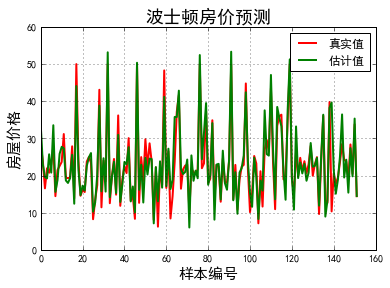

In [30]:
t = np.arange(len(y_pred))
mpl.rcParams['font.sans-serif'] = [u'simHei']
mpl.rcParams['axes.unicode_minus'] = False
plt.figure(facecolor='w')
plt.plot(t, y_test.ravel(), 'r-', lw=2, label=u'真实值')
plt.plot(t, y_pred, 'g-', lw=2, label=u'估计值')
plt.legend(loc='best')
plt.title(u'波士顿房价预测', fontsize=18)
plt.xlabel(u'样本编号', fontsize=15)
plt.ylabel(u'房屋价格', fontsize=15)
plt.grid()
plt.show()